# Classifying images with Adaptive Learning Rates.

Design of a Convolutional Neural Network (CNN) trained to classify the digits of the MNIST dataset using the following Learning Rate planning strategies.

1.   Constant Learning Rate.
2.   Learning Rate Step-Decay.
3.   Cyclic Learning Rate.

Visualization in a graph of the evolution of the validation loss for the three models.

In [ ]:
!pip install -q -U tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.6 MB/s eta 0:00:00


In [ ]:
# We import the necessary libraries.
import numpy as np
import tensorflow as tf
import sklearn as sk
import matplotlib.pyplot as plt

from tensorflow.keras.layers     import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils      import to_categorical
from tensorflow.keras            import Sequential

from tensorflow.keras.callbacks   import LearningRateScheduler
from tensorflow_addons.optimizers import CyclicalLearningRate


In [ ]:
# We load the MNIST dataset.
mnist = np.genfromtxt('./sample_data/mnist_train_small.csv', delimiter=',')

# Separate the labels from the images.
X = mnist[:, 1:]
Y = mnist[:, 0:1]

# We scale the data and One-Hot Encoding the output.
Xn = X / 255
Yn = to_categorical(Y)

# We use Sklearn's data splitter to train/test
from sklearn.model_selection import train_test_split

# Partition train/test split to monitor overfitting.
X_train, X_test, Y_train, Y_test = train_test_split(Xn, Yn, test_size=0.3)

In [ ]:
# Organize the data in the form of tensors.
X_train = X_train.reshape(14000, 28, 28, 1)
X_test = X_test.reshape(6000, 28, 28, 1)

In [ ]:
# Constant Learning Rate

# Create the model.
model_uno = Sequential()

# Create the first convolutional layer.
model_uno.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))

# Add a layer of MaxPooling.
model_uno.add(MaxPooling2D())

# We create the second convolutional layer.
model_uno.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

# Add a second layer of MaxPooling.
model_uno.add(MaxPooling2D())

# Create the third convolutional layer.
model_uno.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

# Add a third layer of MaxPooling.
model_uno.add(MaxPooling2D())

# We convert the feature maps to vector.
model_uno.add(Flatten())

# We create the last layer with Dense connections.
model_uno.add(Dense(units=10, activation='softmax'))

model_uno.compile(optimizer=SGD(learning_rate=0.5), 
              loss="mse",
              metrics=["acc"])


# ---- MODEL TRAINING ---- #
hist1 = model_uno.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=8, epochs=25)

Epoch 1/25
1750/1750 [==============================] - 17s 9ms/step - loss: 0.0378 - acc: 0.7118 - val_loss: 0.0124 - val_acc: 0.9190
Epoch 2/25
1750/1750 [==============================] - 16s 9ms/step - loss: 0.0098 - acc: 0.9358 - val_loss: 0.0086 - val_acc: 0.9425
Epoch 3/25
1750/1750 [==============================] - 19s 11ms/step - loss: 0.0069 - acc: 0.9544 - val_loss: 0.0068 - val_acc: 0.9552
Epoch 4/25
1750/1750 [==============================] - 16s 9ms/step - loss: 0.0053 - acc: 0.9669 - val_loss: 0.0059 - val_acc: 0.9607
Epoch 5/25
1750/1750 [==============================] - 15s 9ms/step - loss: 0.0046 - acc: 0.9699 - val_loss: 0.0057 - val_acc: 0.9638
Epoch 6/25
1750/1750 [==============================] - 16s 9ms/step - loss: 0.0038 - acc: 0.9749 - val_loss: 0.0055 - val_acc: 0.9635
Epoch 7/25
1750/1750 [==============================] - 15s 9ms/step - loss: 0.0031 - acc: 0.9805 - val_loss: 0.0052 - val_acc: 0.9668
Epoch 8/25
1750/1750 [==============================] 

In [ ]:
# Learning Rate Step-Decay
from tensorflow.keras.callbacks import LearningRateScheduler

# Create the model.
model_dos = Sequential()

# Create the first convolutional layer.
model_dos.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))

# Add a layer of MaxPooling.
model_dos.add(MaxPooling2D())

# We create the second convolutional layer.
model_dos.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

# Add a second layer of MaxPooling.
model_dos.add(MaxPooling2D())

# Create the third convolutional layer.
model_dos.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

# Add a third layer of MaxPooling.
model_dos.add(MaxPooling2D())

# We convert the feature maps to vector.
model_dos.add(Flatten())

# We create the last layer with Dense connections.
model_dos.add(Dense(units=10, activation='softmax'))

# We create a method that receives as input what is the time and the
# current learning ratio, and which returns its update.

def scheduler(epoch, lr):
    return lr * 1 / (1 + 0.01 * epoch)

# Now we configure a callback that will be used by the scheduler we have created.
planificador = LearningRateScheduler(scheduler)

# We configure the model, with the possibility of setting an initial learning_rate
# that will be modified after each epoch as planned.
model_dos.compile(optimizer=SGD(learning_rate=0.5),
                loss="mse",
                metrics=["acc"])

# ---- MODEL TRAINING ---- #

# The last step will be to tell the training method what the callback is
# that we have created to vary the learning ratio.
hist2 = model_dos.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=8, callbacks=[planificador], epochs=25)

Epoch 1/25
1750/1750 [==============================] - 17s 9ms/step - loss: 0.0364 - acc: 0.7141 - val_loss: 0.0146 - val_acc: 0.9043 - lr: 0.5000
Epoch 2/25
1750/1750 [==============================] - 16s 9ms/step - loss: 0.0102 - acc: 0.9334 - val_loss: 0.0087 - val_acc: 0.9453 - lr: 0.4950
Epoch 3/25
1750/1750 [==============================] - 15s 9ms/step - loss: 0.0073 - acc: 0.9518 - val_loss: 0.0070 - val_acc: 0.9545 - lr: 0.4853
Epoch 4/25
1750/1750 [==============================] - 16s 9ms/step - loss: 0.0058 - acc: 0.9618 - val_loss: 0.0061 - val_acc: 0.9605 - lr: 0.4712
Epoch 5/25
1750/1750 [==============================] - 16s 9ms/step - loss: 0.0045 - acc: 0.9704 - val_loss: 0.0053 - val_acc: 0.9660 - lr: 0.4531
Epoch 6/25
1750/1750 [==============================] - 16s 9ms/step - loss: 0.0038 - acc: 0.9756 - val_loss: 0.0054 - val_acc: 0.9667 - lr: 0.4315
Epoch 7/25
1750/1750 [==============================] - 18s 10ms/step - loss: 0.0032 - acc: 0.9792 - val_loss: 0

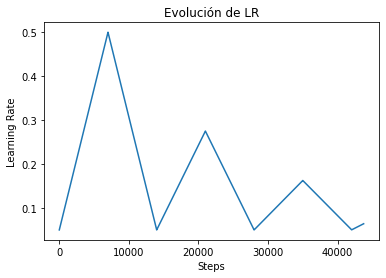

In [ ]:
# Cyclic Learning Rate.
from tensorflow_addons.optimizers import CyclicalLearningRate

# Batch size hyperparameter.
batch_size = 8

# Number of steps that are fulfilled per epoch.
steps_per_epoch = len(X_train) // batch_size


# ---- MODEL CONFIGURATION ---- #

clr = CyclicalLearningRate(initial_learning_rate=0.05,
                           maximal_learning_rate=0.5,
                           step_size= 4 * steps_per_epoch,
                           scale_fn= lambda x: 1/(2**(x-1)))


# We visualize the evolution of the Learning Rate.
step = np.arange(0, 25 * steps_per_epoch)
lr = clr(step)
plt.plot(step, lr)
plt.xlabel("Steps")
plt.ylabel("Learning Rate")
plt.title("Evolución de LR")
plt.show()

In [ ]:
# Create the model.
model_tres = Sequential()

# Create the first convolutional layer.
model_tres.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))

# Add a layer of MaxPooling.
model_tres.add(MaxPooling2D())

# We create the second convolutional layer.
model_tres.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

# Add a second layer of MaxPooling.
model_tres.add(MaxPooling2D())

# Create the third convolutional layer
model_tres.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

# Add a third layer of MaxPooling.
model_tres.add(MaxPooling2D())

# We convert the feature maps to vector.
model_tres.add(Flatten())

# We create the last layer with Dense connections.
model_tres.add(Dense(units=10, activation='softmax'))



In [ ]:
# ---- COMPILE MODEL ---- #

model_tres.compile(optimizer=SGD(learning_rate=clr),
                loss="mse",
                metrics=["acc"])

hist3 = model_tres.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=8, epochs=25)

Epoch 1/25
1750/1750 [==============================] - 18s 10ms/step - loss: 0.0793 - acc: 0.3590 - val_loss: 0.0349 - val_acc: 0.7568
Epoch 2/25
1750/1750 [==============================] - 17s 9ms/step - loss: 0.0218 - acc: 0.8530 - val_loss: 0.0145 - val_acc: 0.9023
Epoch 3/25
1750/1750 [==============================] - 16s 9ms/step - loss: 0.0121 - acc: 0.9190 - val_loss: 0.0096 - val_acc: 0.9392
Epoch 4/25
1750/1750 [==============================] - 17s 10ms/step - loss: 0.0086 - acc: 0.9421 - val_loss: 0.0079 - val_acc: 0.9492
Epoch 5/25
1750/1750 [==============================] - 16s 9ms/step - loss: 0.0065 - acc: 0.9568 - val_loss: 0.0075 - val_acc: 0.9530
Epoch 6/25
1750/1750 [==============================] - 17s 9ms/step - loss: 0.0047 - acc: 0.9695 - val_loss: 0.0053 - val_acc: 0.9653
Epoch 7/25
1750/1750 [==============================] - 16s 9ms/step - loss: 0.0034 - acc: 0.9782 - val_loss: 0.0053 - val_acc: 0.9665
Epoch 8/25
1750/1750 [==============================]

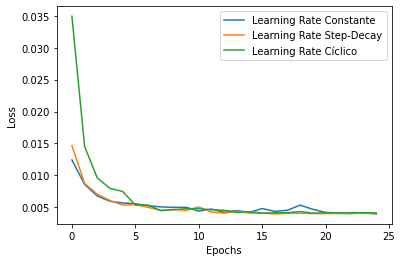

In [ ]:
# Visualize in a graph the evolution of the validation loss for the three models.

# We visualize the progression of the loss during the training.
plt.plot(np.arange(len(hist1.history['val_loss'])), hist1.history['val_loss'])
plt.plot(np.arange(len(hist2.history['val_loss'])), hist2.history['val_loss'])
plt.plot(np.arange(len(hist3.history['val_loss'])), hist3.history['val_loss'])

# We add information to the graphs.
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Learning Rate Constante', 'Learning Rate Step-Decay', 'Learning Rate Cíclico'])
plt.show()